In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10
plt.rcParams["font.family"] = "NanumGothicCoding"
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False
import seaborn as sns
from plotnine import *
import missingno as msno
%matplotlib inline

공공 데이터 상권 정보 분석하기 => https://www.data.go.kr/dataset/15012005/fileData.do

In [2]:
# 2016년 상권별 업종밀집 통계 => 상권별 밀집도를 보여준다
# encoding 속성을 생략하면 'utf-8'이 기본값으로 사용된다. 'utf-8'로 읽어오지 못한다면 encoding 속성값을 'euc-kr', 'cp949',
# 'ms949'로 변경해서 읽는다.
# shop = pd.read_csv('./data/shop_2016.csv', encoding='euc-kr', engine='python')
shop = pd.read_csv('./data/shop_2016.csv', encoding='ms949')
shop

상권명칭  상권번호    관리년월    대분류명    중분류명  과밀지수(밀집도)
0              강릉역광장_2  2523  201601      소매  가전제품소매     1.0818
1                구미역_3  1149  201601      소매  가전제품소매     0.8865
2       전북 전주시 중화산1동_1   768  201601      소매  가전제품소매     1.1757
3              충청북도청_2  1309  201601      소매  가전제품소매     0.3574
4        충북 청주시 복대1동_1  1311  201601      소매  가전제품소매     0.6849
...                ...   ...     ...     ...     ...        ...
805676    경남 양산시 덕계동_1   626  201612      소매     NaN     1.2906
805677   경북 구미시 신평1동_2  1143  201612  업종분류불능     NaN     0.5677
805678           안양역_5  1663  201612      소매     NaN     1.6597
805679             양산역   616  201612      소매     NaN     1.4103
805680           망포역_2  1473  201612  업종분류불능     NaN     0.7113

[805681 rows x 6 columns]

In [3]:
shop_2018_06 = pd.read_csv('./data/shop_201806_01.csv', encoding='cp949')
shop_2018_06.shape

(499328, 39)

In [4]:
shop_2018_06.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
3  19912201       싱싱커피&토스트         NaN         Q       음식       Q07     패스트푸드   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호       건물명  \
0    Q09A01        호프/맥주   I56219  ...  1168010600106040000014378      대치상가   
1    Q12A01  커피전문점/카페/다방   I56220  ...  1168010100106960042022041       NaN   
2    Q09A01        호프/맥주   I56219  ...  1154510200101620001017748       NaN   
3    Q07A10        토스트전문   I56192  ...  2653010400105780000002037  산업용품유통상가   
4    F09A02   사우나/증기탕/온천   S96121  ...  1171010500102560005010490       NaN   

                  도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
0  서울특별시 강남구 남부순환로 2933  135280   6280.0  NaN   1  NaN  127.061026  37.493922  
1    서울특별시 강남구 선릉로93길 6  135080   6149.0  NaN   1  NaN  127.047883  37.505675  
2    서울특별시 금천구 가산로 34-6  153010   8545.0  NaN   1  NaN  126.899220  37.471711  
3      부산광역시 사상구 괘감로 37  617726  46977.0  NaN   1   26  128.980455  35.159774  
4      서울특별시 송파구 가락로 71  138846   5690.0  NaN   1  NaN  127.104071  37.500249  

[5 rows x 39 columns]

In [5]:
shop_2018_06.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [6]:
# 분석 작업에 필요한 column만 추려낸다.
view_columns = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명',
               '행정동명', '법정동명', '지번주소', '도로명주소', '경도', '위도']
shop_2018_06[view_columns].head()

상호명         지점명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  \
0         와라와라호프         NaN       음식      유흥주점        호프/맥주  서울특별시  강남구   
1  커피빈코리아선릉로93길점  코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
2           프로포즈         NaN       음식      유흥주점        호프/맥주  서울특별시  금천구   
3       싱싱커피&토스트         NaN       음식     패스트푸드        토스트전문  부산광역시  사상구   
4       가락사우나내스낵         NaN    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   

   행정동명 법정동명                  지번주소                 도로명주소          경도  \
0  대치1동  대치동     서울특별시 강남구 대치동 604  서울특별시 강남구 남부순환로 2933  127.061026   
1  역삼1동  역삼동  서울특별시 강남구 역삼동 696-42    서울특별시 강남구 선릉로93길 6  127.047883   
2  독산3동  독산동   서울특별시 금천구 독산동 162-1    서울특별시 금천구 가산로 34-6  126.899220   
3   괘법동  괘법동     부산광역시 사상구 괘법동 578      부산광역시 사상구 괘감로 37  128.980455   
4   석촌동  석촌동     서울특별시 송파구 석촌동 256      서울특별시 송파구 가락로 71  127.104071   

          위도  
0  37.493922  
1  37.505675  
2  37.471711  
3  35.159774  
4  37.500249

In [7]:
shop_2018_06.isnull().sum()

상가업소번호            0
상호명               1
지점명          432587
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      28731
표준산업분류명       28731
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         86552
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        434501
건물관리번호            0
건물명          274150
도로명주소             0
구우편번호             0
신우편번호             9
동정보          455420
층정보          191133
호정보          427356
경도                0
위도                0
dtype: int64

<AxesSubplot:>

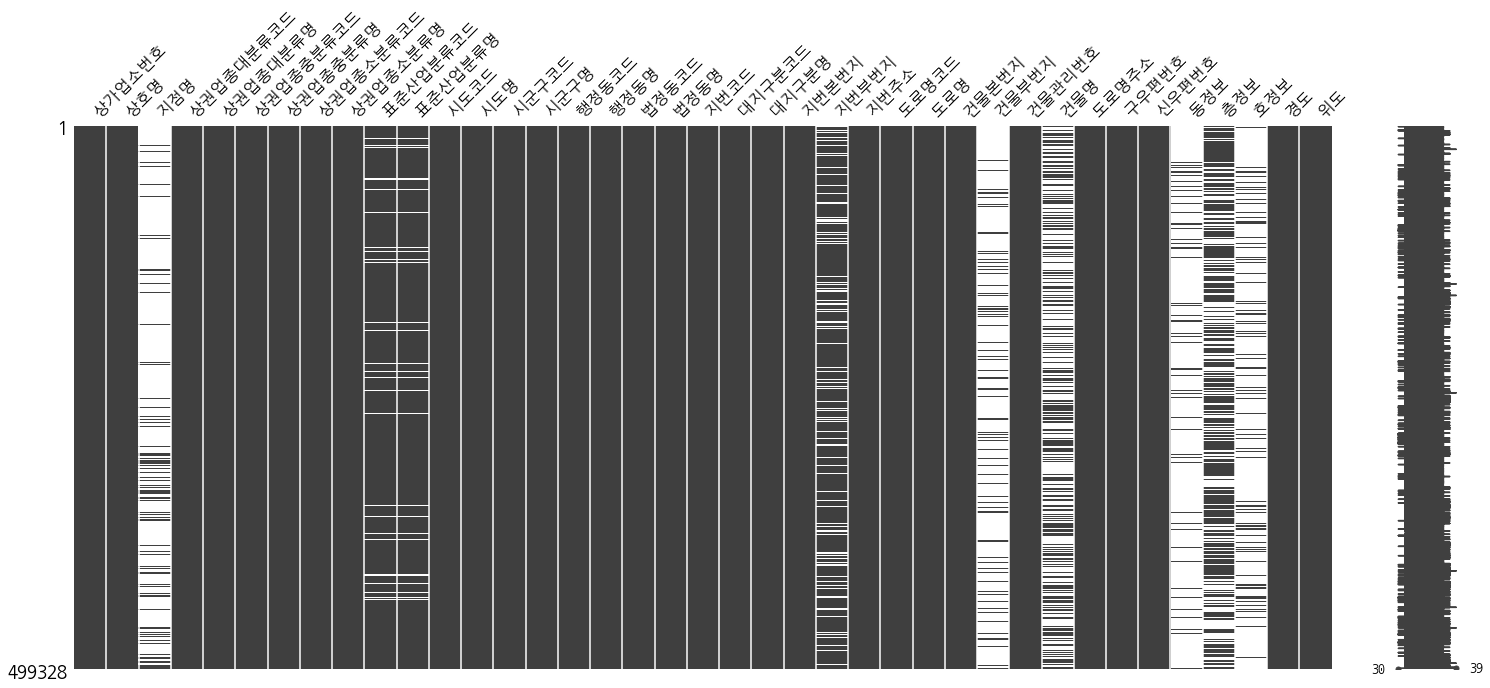

In [8]:
msno.matrix(shop_2018_06)

<AxesSubplot:>

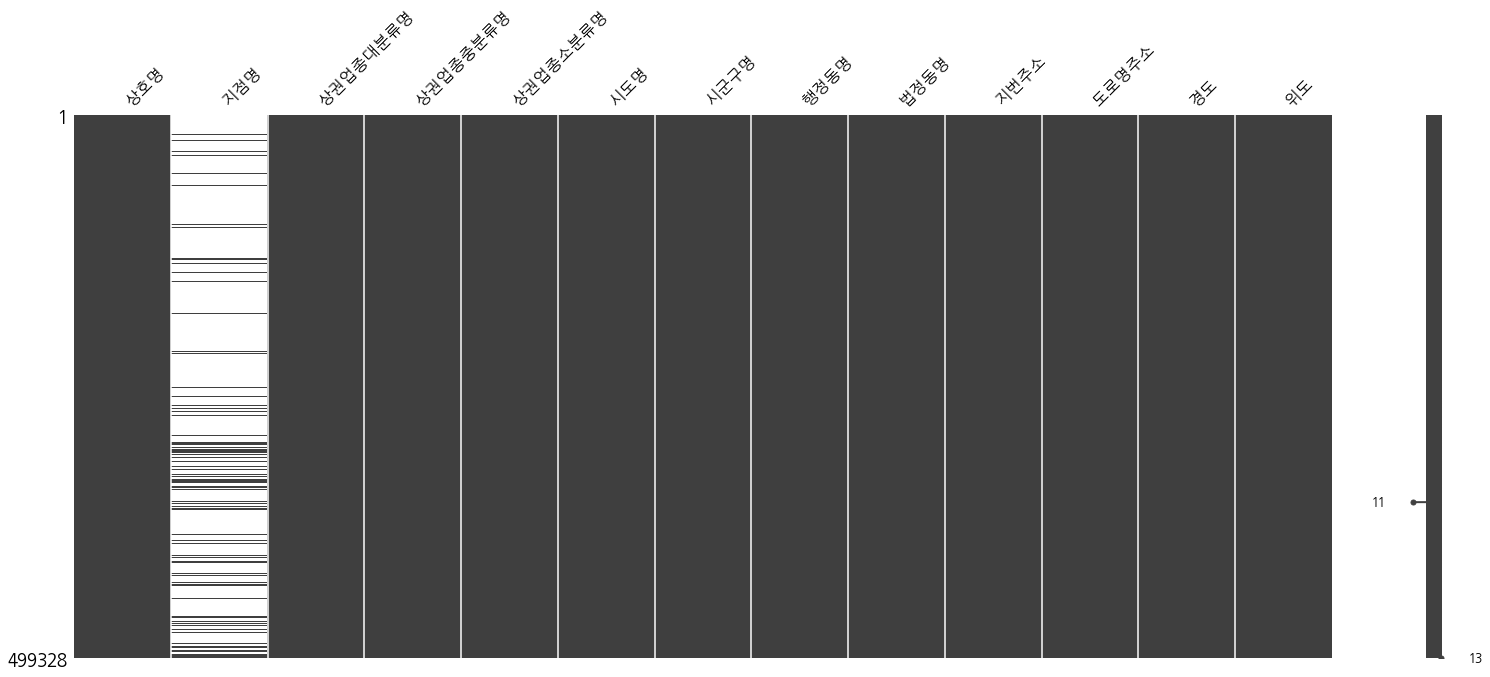

In [9]:
msno.matrix(shop_2018_06[view_columns])

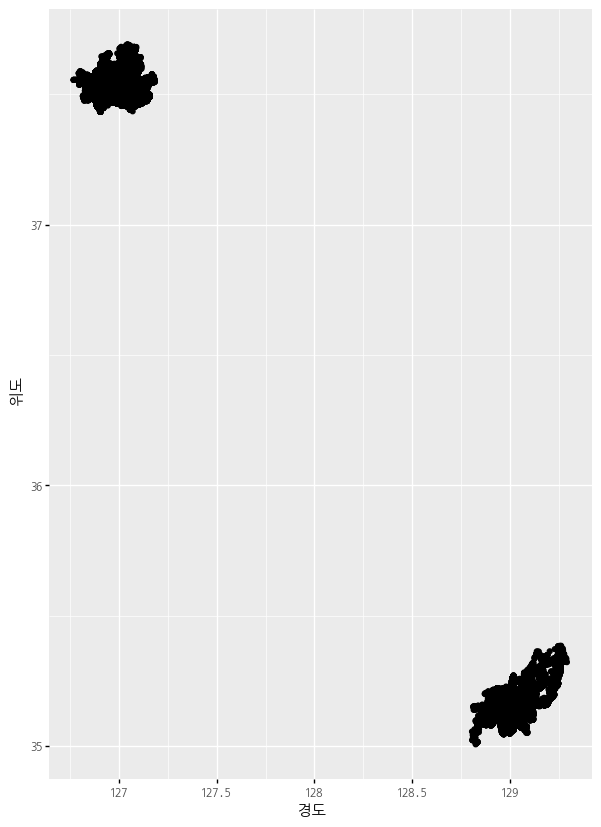

<ggplot: (-9223371942787883702)>

In [10]:
ggplot(shop_2018_06, aes(x='경도', y='위도')) \
    + geom_point() \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(7, 10))

<AxesSubplot:xlabel='경도', ylabel='위도'>

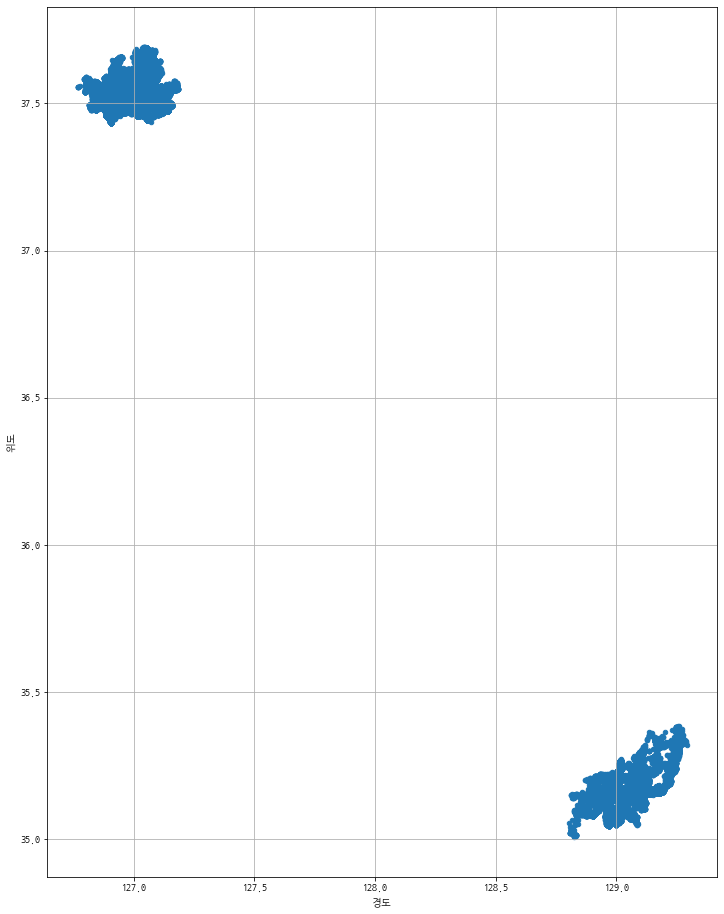

In [11]:
shop_2018_06.plot.scatter(x='경도', y='위도', grid=True, figsize=(12, 16))

In [12]:
# 데이터를 시각화 시켜보니 서울과 부산만 있는거 같다. => 그래서 서울과 그 이외의 데이터로 나눈다.
shop_seoul = shop_2018_06.loc[shop_2018_06['도로명주소'].str.startswith('서울')]
shop_seoul.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   
5  19975850           허술한집         NaN         Q       음식       Q04        분식   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호   건물명  \
0    Q09A01        호프/맥주   I56219  ...  1168010600106040000014378  대치상가   
1    Q12A01  커피전문점/카페/다방   I56220  ...  1168010100106960042022041   NaN   
2    Q09A01        호프/맥주   I56219  ...  1154510200101620001017748   NaN   
4    F09A02   사우나/증기탕/온천   S96121  ...  1171010500102560005010490   NaN   
5    Q04A01       라면김밥분식   I56194  ...  1150010800100450031005883   NaN   

                  도로명주소   구우편번호   신우편번호  동정보 층정보  호정보          경도         위도  
0  서울특별시 강남구 남부순환로 2933  135280  6280.0  NaN   1  NaN  127.061026  37.493922  
1    서울특별시 강남구 선릉로93길 6  135080  6149.0  NaN   1  NaN  127.047883  37.505675  
2    서울특별시 금천구 가산로 34-6  153010  8545.0  NaN   1  NaN  126.899220  37.471711  
4      서울특별시 송파구 가락로 71  138846  5690.0  NaN   1  NaN  127.104071  37.500249  
5    서울특별시 강서구 공항대로3길 9  157812  7619.0  NaN   1  NaN  126.809957  37.562013  

[5 rows x 39 columns]

In [13]:
# '~'는 ~가 아닌것을 의미한다.
shop_except_seoul = shop_2018_06.loc[~shop_2018_06['도로명주소'].str.startswith('서울')]
shop_except_seoul.head()

상가업소번호       상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
3   19912201  싱싱커피&토스트  NaN         Q       음식       Q07    패스트푸드    Q07A10   
22  20047434    경부할인마트  NaN         D       소매       D03    종합소매점    D03A06   
23  20037352       마니쩜  NaN         Q       음식       Q09     유흥주점    Q09A01   
24  20038373     경주아구찜  NaN         Q       음식       Q03   일식/수산물    Q03A06   
30  20031733  동해제일산오징어  NaN         Q       음식       Q03   일식/수산물    Q03A13   

   상권업종소분류명 표준산업분류코드  ...                     건물관리번호       건물명  \
3     토스트전문   I56192  ...  2653010400105780000002037  산업용품유통상가   
22     종합소매   G47190  ...  2617010100107940681015812       NaN   
23    호프/맥주   I56219  ...  2623011000104500002043836     가남아파트   
24     아구전문   I56111  ...  2650010500103570010019103       NaN   
30   낙지/오징어   I56111  ...  2626010800113800002003460       NaN   

                       도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도  \
3           부산광역시 사상구 괘감로 37  617726  46977.0  NaN   1   26  128.980455   
22          부산광역시 동구 망양로 593  601831  48716.0  NaN   1  NaN  129.034599   
23       부산광역시 부산진구 대학로 64-1  614010  47336.0  NaN   2  NaN  129.034302   
24       부산광역시 수영구 수영로 381-8  613010  48318.0  NaN   1  NaN  129.106330   
30  부산광역시 동래구 아시아드대로220번길 30  607060  47838.0  NaN   1  NaN  129.068324   

           위도  
3   35.159774  
22  35.123196  
23  35.150069  
24  35.141176  
30  35.202902  

[5 rows x 39 columns]

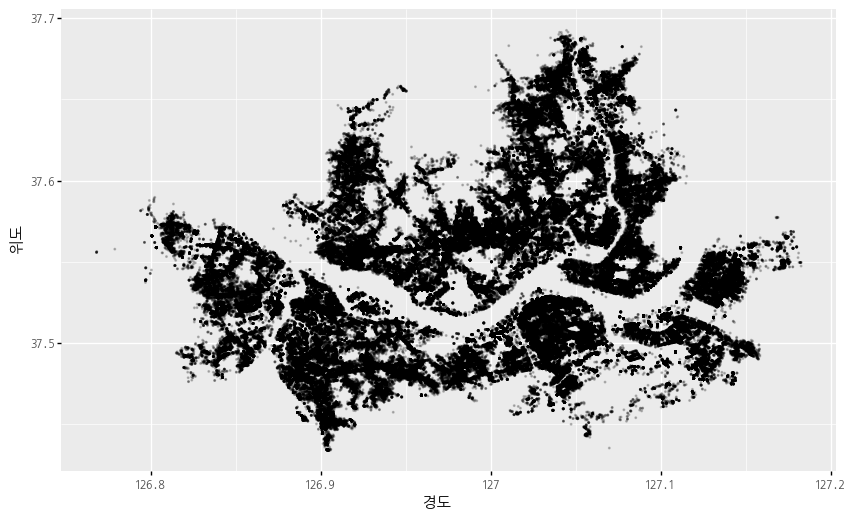

<ggplot: (94033803398)>

In [14]:
# 서울만 찍어봤더니 서울 지도하고 비슷하게 나온다.
ggplot(shop_seoul, aes(x='경도', y='위도')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

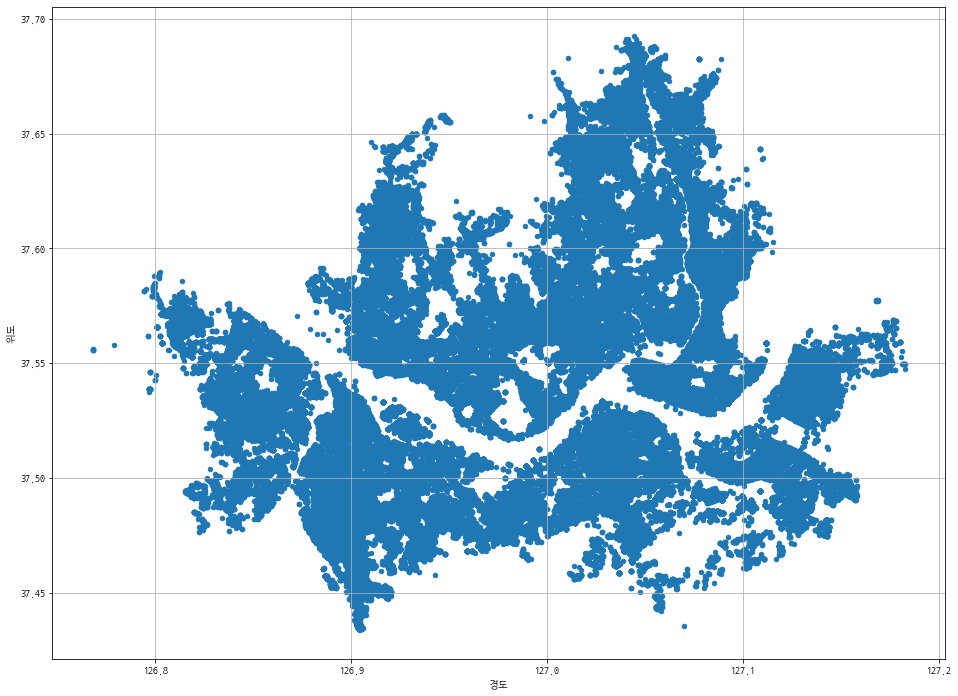

In [15]:
shop_seoul.plot.scatter(x='경도', y='위도', grid=True, figsize=(16, 12))

In [16]:
# 데이터프레임의 도로명 주소를 활용해서 '시도', '구군' 열을 만든다.
# str.split() 메소드에 expand=True 옵션을 지정해서 구분자를 경계로 문자열을 서로 다른 열(데이터프레임)로 구분해서 '시도' 열과
# '구군' 열을 만든다.
# expand=True 옵션을 지정하면 구분자를 경계로 문자열을 구분해서 데이터프레임 타입으로 출력한다. => 여러개의 열로 나눈다.
# print(type(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)))
# print(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)[0])
# print(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)[1])

shop_2018_06['시도'] = shop_2018_06['도로명주소'].str.split(' ', expand=True)[0]
shop_2018_06['구군'] = shop_2018_06['도로명주소'].str.split(' ', expand=True)[1]
shop_2018_06.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

In [17]:
# '시도' 열과 '구군' 열이 추가된 원본 데이터프레임에서 서울만 추출해 서울 데이터프레임을 다시 만들어준다.
shop_seoul = shop_2018_06.loc[shop_2018_06['도로명주소'].str.startswith('서울')]

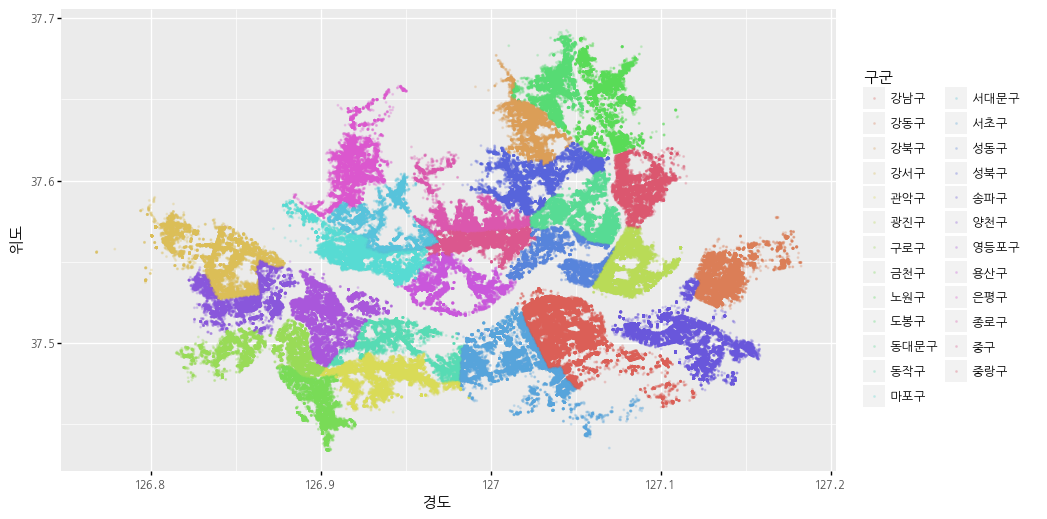

<ggplot: (-9223371942789443703)>

In [18]:
ggplot(shop_seoul, aes(x='경도', y='위도', color='구군')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

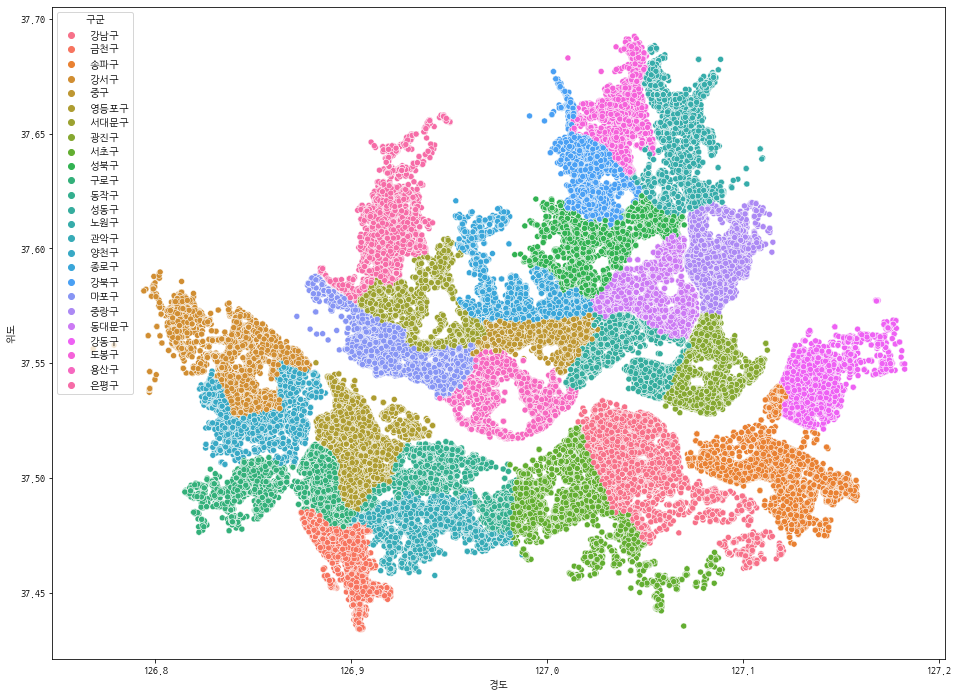

In [19]:
# seaborn 라이브러리를 이용한 시각화
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul, x='경도', y='위도', hue='구군')

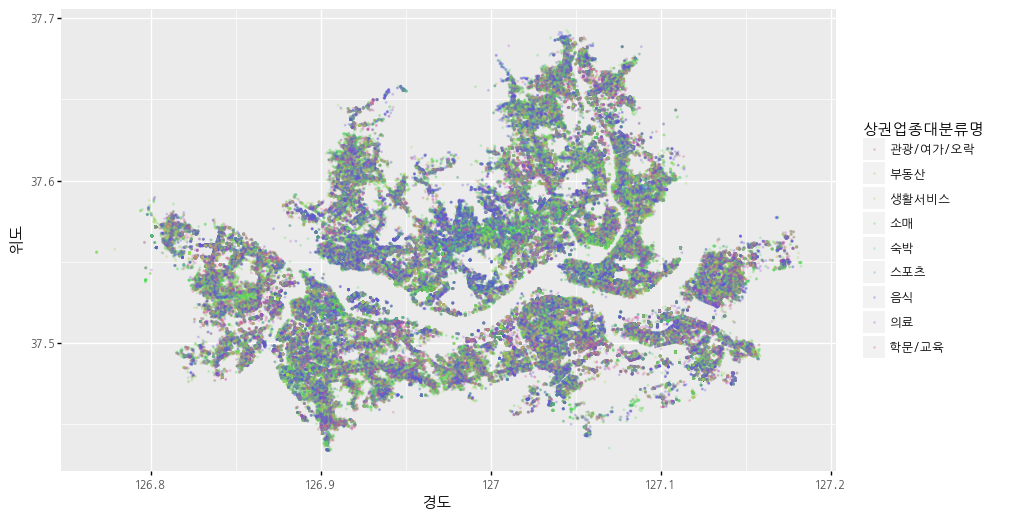

<ggplot: (-9223371942769428550)>

In [20]:
ggplot(shop_seoul, aes(x='경도', y='위도', color='상권업종대분류명')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6)) \
    + scale_fill_gradient(low='blue', high='green')

<AxesSubplot:xlabel='경도', ylabel='위도'>

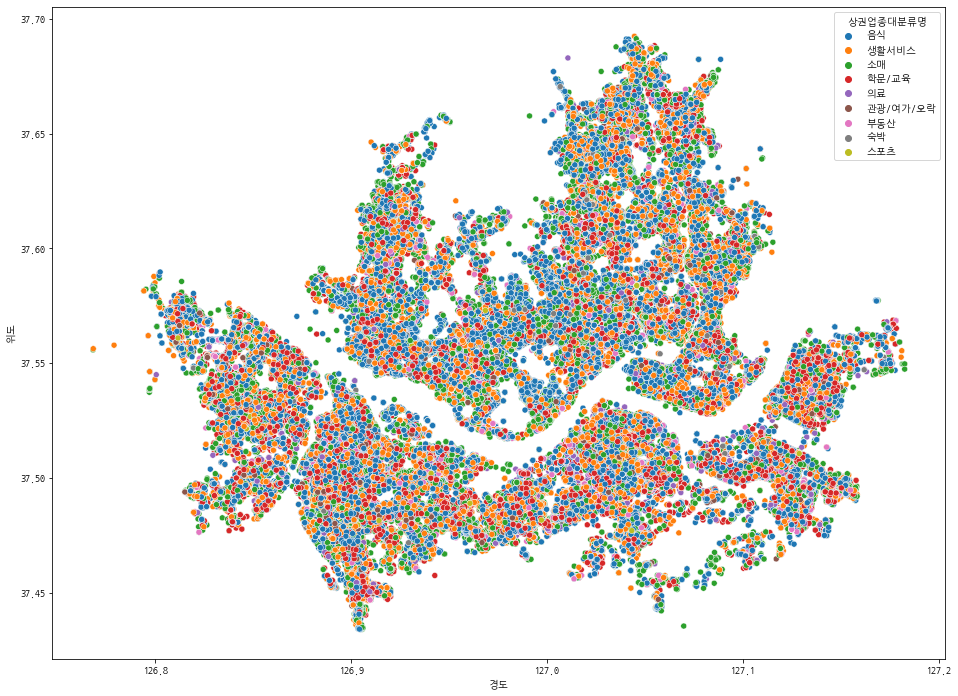

In [21]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul, x='경도', y='위도', hue='상권업종대분류명')

In [22]:
# 학문/교육과 관련된 정보 보기
shop_seoul_edu = shop_seoul[shop_seoul['상권업종대분류명'] == '학문/교육']
shop_seoul_edu.shape

(27717, 41)

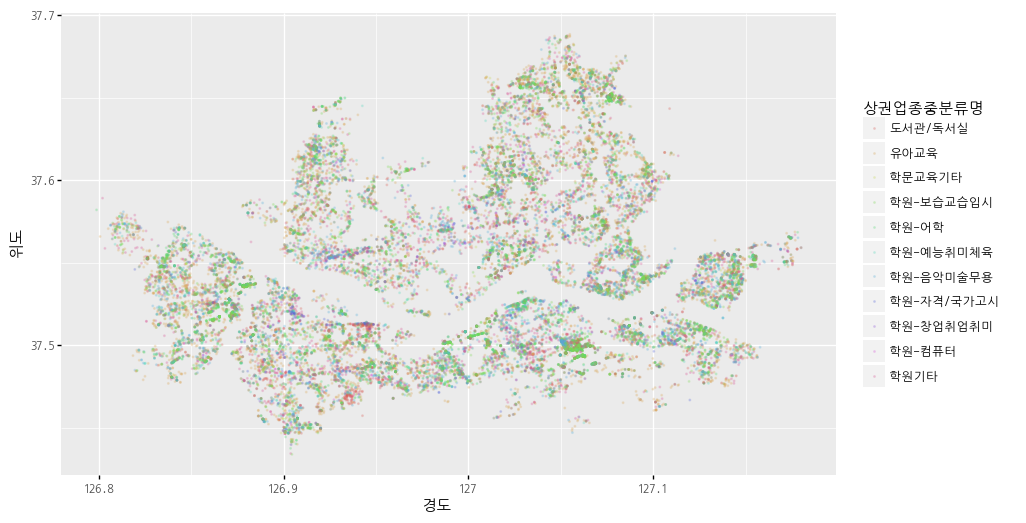

<ggplot: (-9223371942820992140)>

In [23]:
ggplot(shop_seoul_edu, aes(x='경도', y='위도', color='상권업종중분류명')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

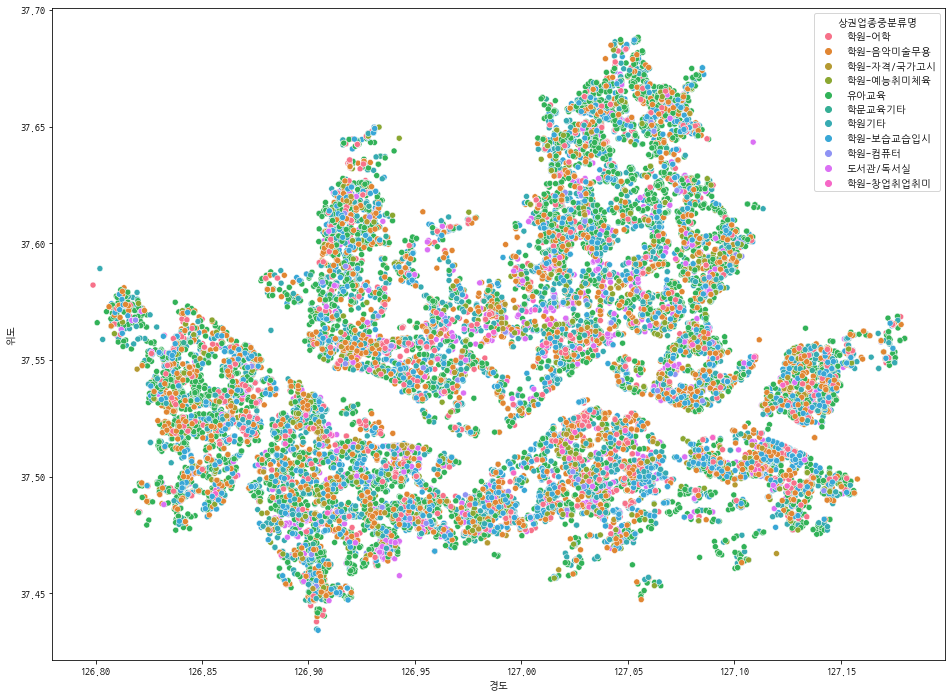

In [24]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul_edu, x='경도', y='위도', hue='상권업종중분류명')

In [26]:
# 부동산과 관련된 정보 보기
shop_seoul_realty = shop_seoul[shop_seoul['상권업종대분류명'] == '부동산']
shop_seoul_realty.shape

(13164, 41)

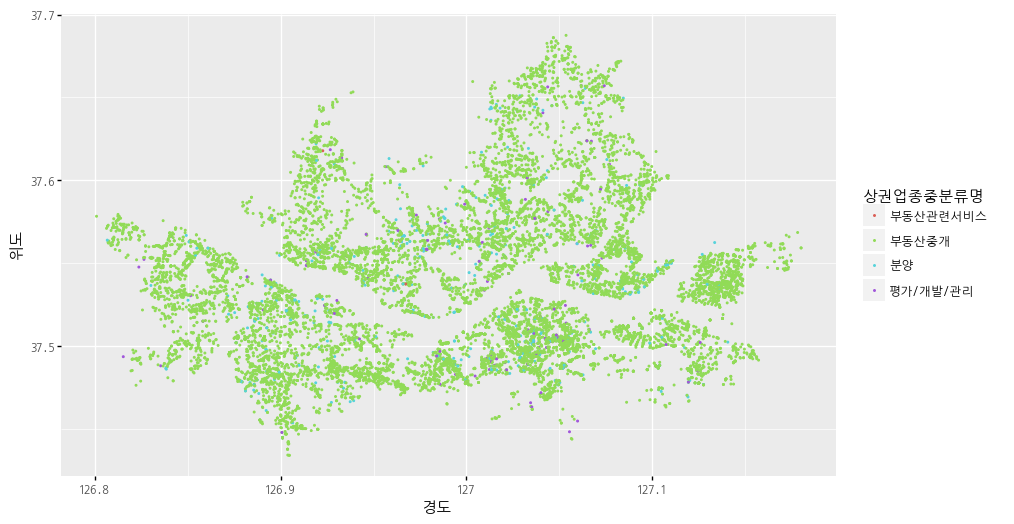

<ggplot: (-9223371942765646855)>

In [29]:
ggplot(shop_seoul_realty, aes(x='경도', y='위도', color='상권업종중분류명')) \
    + geom_point(size=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

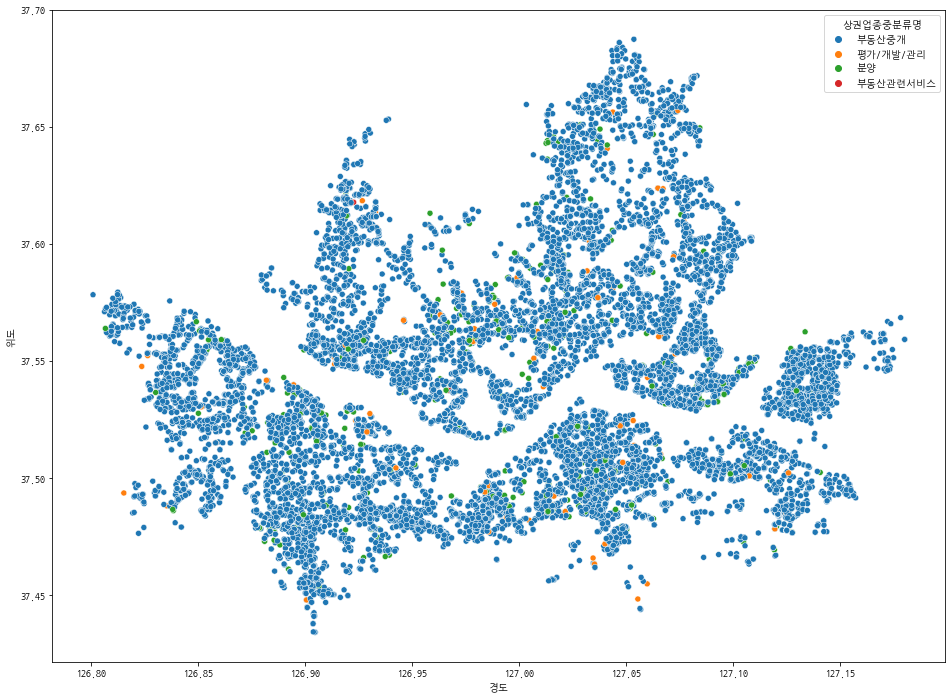

In [33]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul_realty, x='경도', y='위도', hue='상권업종중분류명')

In [44]:
# 학원-컴퓨터
shop_seoul_edu_computer = shop_seoul[shop_seoul['상권업종중분류명'] == '학원-컴퓨터']
shop_seoul_edu_computer.head()

상가업소번호          상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
442   22350142    아이비씨에듀케이션  NaN         R    학문/교육       R06   학원-컴퓨터   
2687  20850409  서원초등학교컴퓨터교실  NaN         R    학문/교육       R06   학원-컴퓨터   
3678  21780700     이찬진컴퓨터교실  NaN         R    학문/교육       R06   학원-컴퓨터   
3872  21747169      백상컴퓨터학원  NaN         R    학문/교육       R06   학원-컴퓨터   
5517  22349871      보성컴퓨터학원  NaN         R    학문/교육       R06   학원-컴퓨터   

     상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                 도로명주소   구우편번호   신우편번호  \
442     R06A01    컴퓨터학원   P85691  ...      서울특별시 은평구 불광로 51  122040  3358.0   
2687    R06A01    컴퓨터학원   P85691  ...     서울특별시 서초구 고무래로 63  137040  6598.0   
3678    R06A01    컴퓨터학원   P85691  ...  서울특별시 성북구 정릉로38다길 29  136100  2816.0   
3872    R06A01    컴퓨터학원   P85691  ...  서울특별시 구로구 구로중앙로7길 28  152050  8312.0   
5517    R06A01    컴퓨터학원   P85691  ...   서울특별시 성북구 장위로15길 16  136140  2755.0   

      동정보  층정보  호정보          경도         위도     시도   구군  
442   NaN  NaN  NaN  126.930696  37.613419  서울특별시  은평구  
2687  NaN    1  NaN  127.014605  37.502429  서울특별시  서초구  
3678  NaN    1  NaN  127.017025  37.601564  서울특별시  성북구  
3872  NaN    4  NaN  126.889592  37.491327  서울특별시  구로구  
5517  NaN  NaN  NaN  127.041859  37.614905  서울특별시  성북구  

[5 rows x 41 columns]

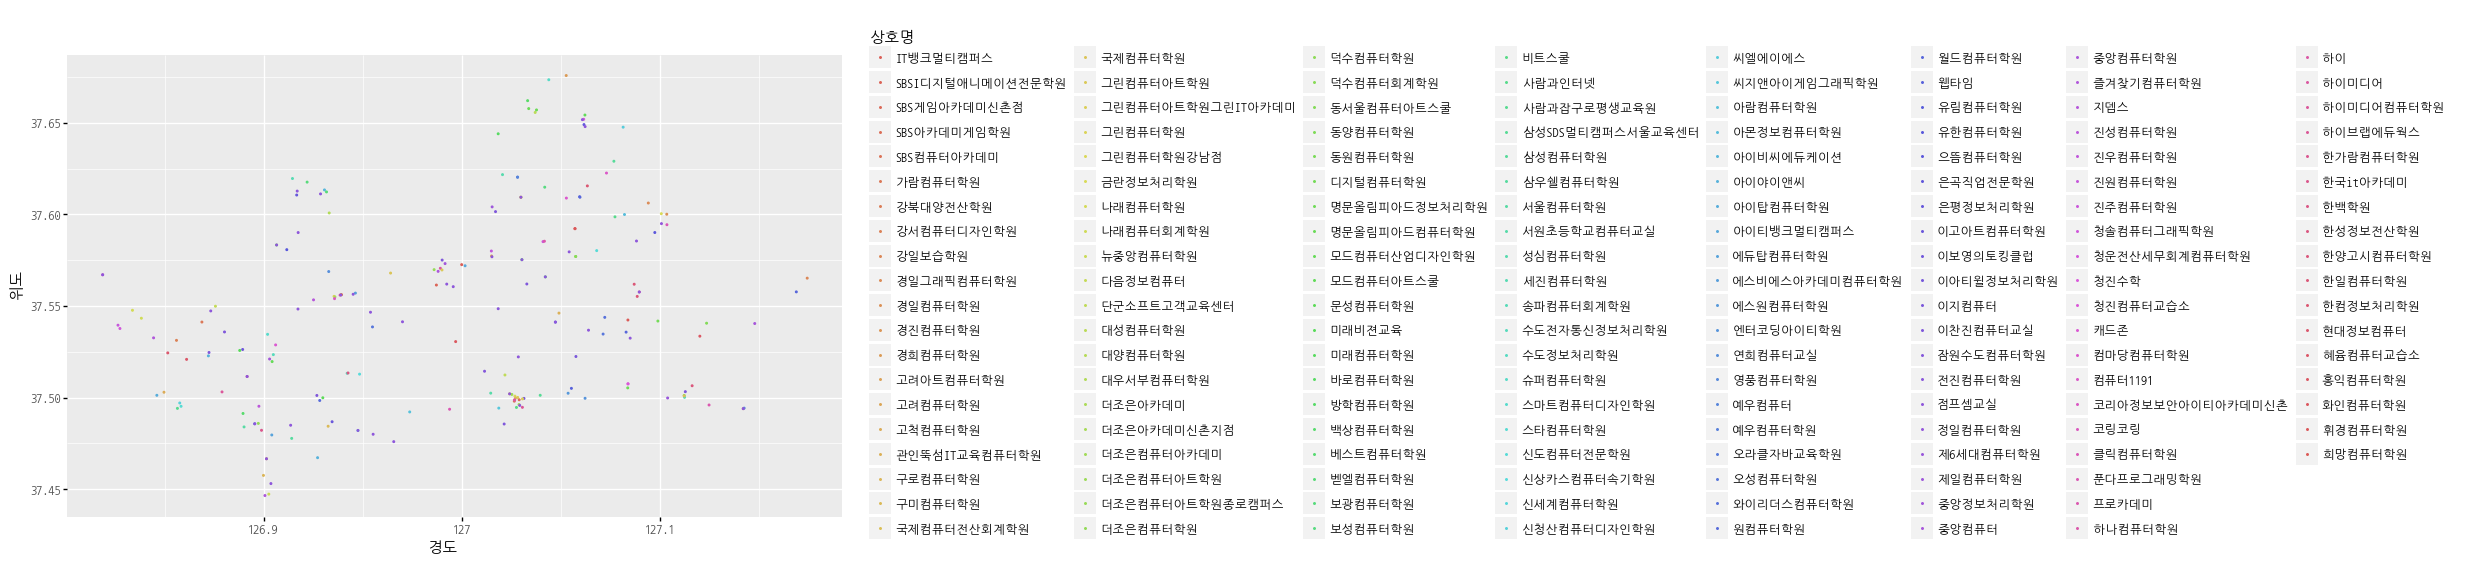

<ggplot: (94035341744)>

In [35]:
ggplot(shop_seoul_edu_computer, aes(x='경도', y='위도', color='상호명')) \
    + geom_point(size=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

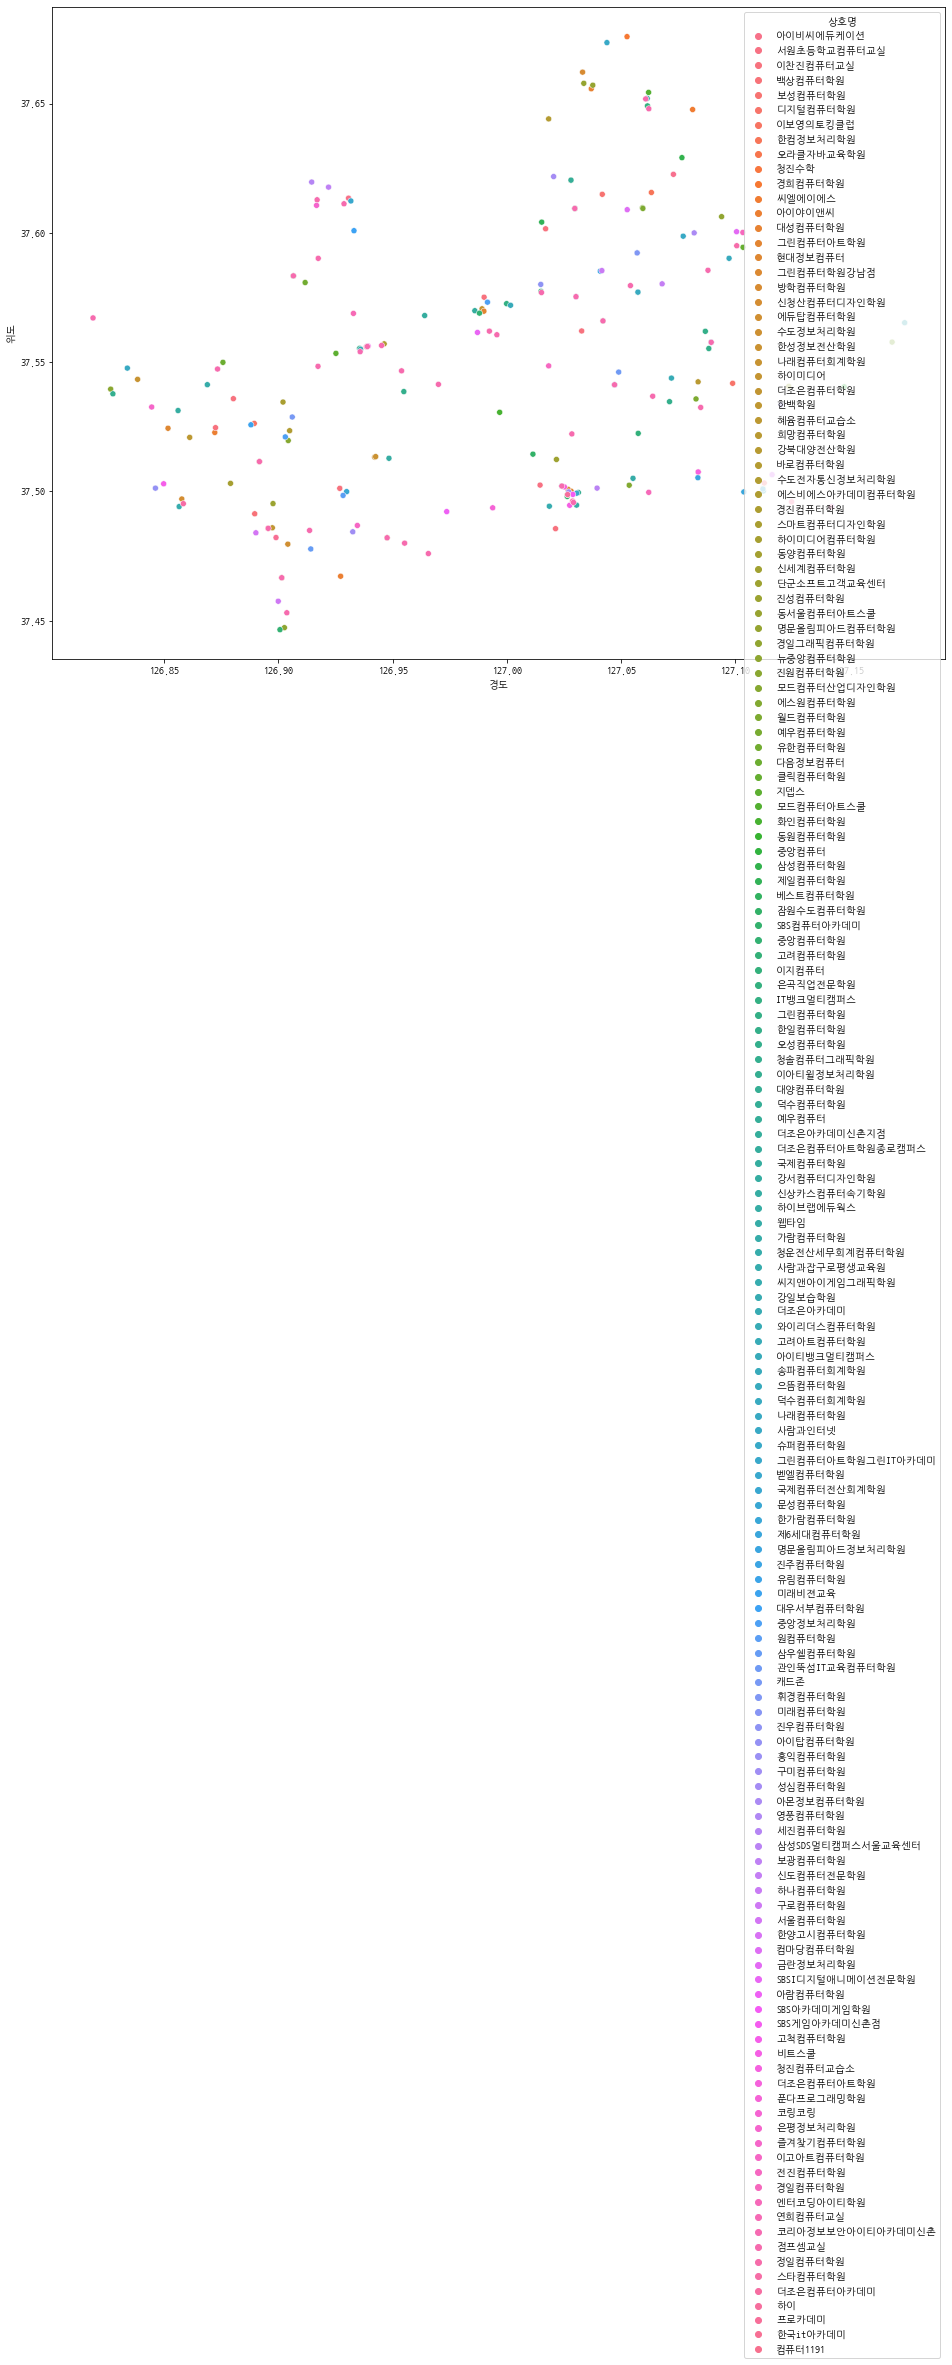

In [36]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul_edu_computer, x='경도', y='위도', hue='상호명')

In [37]:
import folium

In [49]:
data = shop_seoul_edu_computer
edu_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12, 
                    tiles='Stamen Terrain')

for i in data.index:
    edu_name = data.loc[i, '상호명'] + ' - ' + data.loc[i, '도로명주소']
    popup = folium.Popup(edu_name, max_width=500)
    folium.Marker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup).add_to(edu_map)
    
edu_map.save('./output/edu_map.html')
edu_map

In [51]:
# 커피점/카페
shop_seoul_eat = shop_seoul[shop_seoul['상권업종중분류명'] == '커피점/카페']
shop_seoul_eat.shape

(16349, 41)

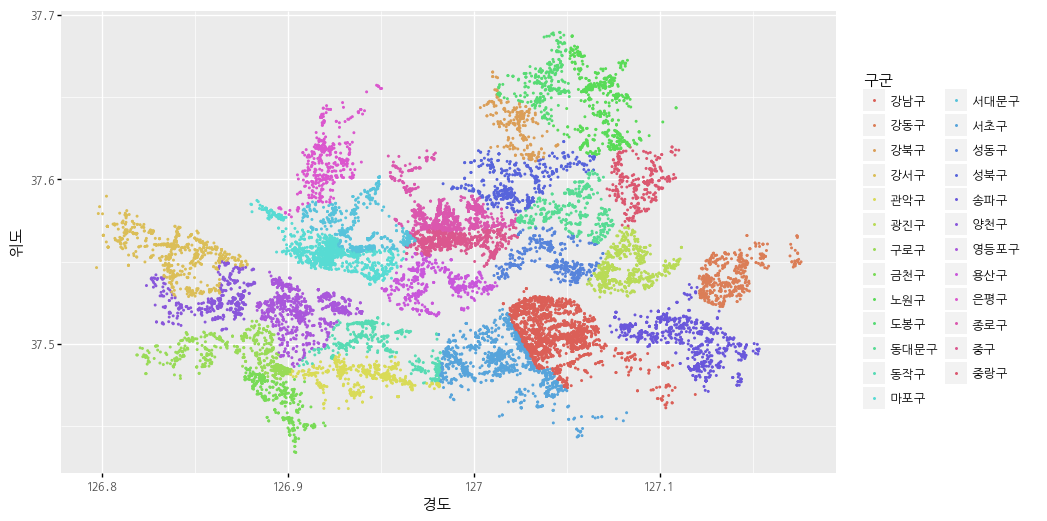

<ggplot: (-9223371942686374940)>

In [53]:
ggplot(shop_seoul_eat, aes(x='경도', y='위도', color='구군')) \
    + geom_point(size=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

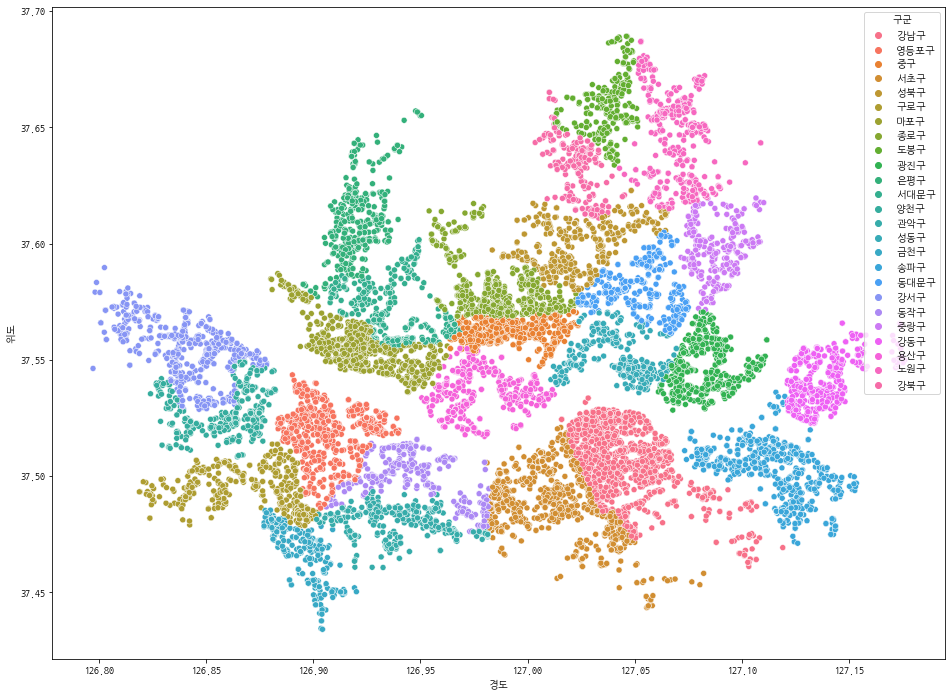

In [54]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul_eat, x='경도', y='위도', hue='구군')

In [62]:
data = shop_seoul_eat[shop_seoul_eat['구군']=='노원구']

edu_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=14, 
                    tiles='Stamen Terrain')

for i in data.index:
    edu_name = data.loc[i, '상호명'] + ' - ' + data.loc[i, '도로명주소']
    popup = folium.Popup(edu_name, max_width=500)
    folium.Marker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup).add_to(edu_map)
    
edu_map.save('./output/eat_map.html')
edu_map